# 1. Постановка задачи

Используя схему бегущего счета и итерационные методы, решить задачу:

$$\left\{\begin{aligned}
\frac{\partial u}{\partial t} - 2t \frac{\partial u}{\partial x} = 3tu^2,\ ~ -\frac{\pi}{2} \leq x < 0,\ 0<t<\frac{1}{2} \\
u(x,0)= -2\sin 2x\\
u(0,t) = - \frac{2\sin2t^2}{1+3t^2\sin{2t^2}} \\ 
\end{aligned}\\
\right.$$

Так как область значений $x$ лежит в отрицательной полуоси, нам придется использовать отрицательный шаг сетки. Что неудобно и может повлечь за собой ошибки. Сделаем замену $x = -x$ и получим вид:

$$\left\{\begin{aligned}
\frac{\partial u}{\partial t} + 2t \frac{\partial u}{\partial x} = 3tu^2,\ ~ 0 < x \leq \frac{\pi}{2},\ 0<t<\frac{1}{2} \\
u(x,0)= 2\sin 2x\\
u(0,t) = - \frac{2\sin2t^2}{1+3t^2\sin{2t^2}} \\ 
\end{aligned}\\
\right.$$


# 2. Построение характеристик
Составим уравнение характеристик и узнаем, будут ли пересекаться их проекции. Если проекции характеристик будут пересекаться, то может возникнуть физическая неоднозначность, и решение может быть неоднозначно (может возникнуть физическая неоднозначность, которой нет в реальном физическом процессе)
Задача допускает аналитическое решение, которое можно получить методом характеристик. Уравнение характеристик имеет вид:
$$ \frac{dt}{1}  = \frac{dx}{2t} = \frac{du}{3tu^2} $$
Получим систему уравнений:
$$ \left\{\begin{aligned}
2t dt = dx \\
dx = \frac{2}{3u^2}du\\
\end{aligned}\\
\right.$$

$$ \left\{\begin{aligned}
x - t^2 = C_1 \\
x + \frac{2}{3u} = C_2\\
\end{aligned}\\
\right.$$

Так как уравнение переноса неоднородно, то имеем одно семейство характеристик, которое задается кривой $x - t^2 = C_1$

In [2]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d

In [3]:
# Возвращает 
def x(c,t_list):
    return [(c + t**2) for t in t_list]


(0, 0.5)

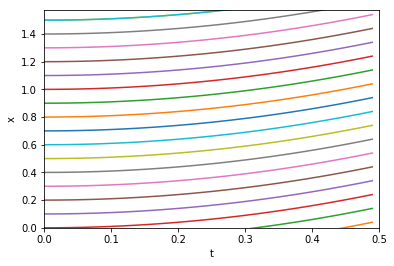

In [4]:
t_list = np.arange(0,0.5,0.01)
c_list = np.arange(-0.3,pi/2,.1)

for c in c_list:
    x_list = x(c,t_list)
    plt.plot(t_list, x_list)

plt.plot(t_list, x_list)
plt.ylim(0,pi/2)
plt.ylabel('x')
plt.xlabel('t')
plt.xlim(0, .5)


Как видим, в области $x∈[0;\frac{\pi}{2}]$ $t∈(0;\frac{1}{2})$ явно пересечений характеристик нет. Следовательно, нет опрокидывания волны, и во всей области решение будет представимо через разностную схему. Будем искать решение в области $x∈(0;\frac{\pi}{2})$ $t∈[0;\frac{1}{2}]$

## Аналитическое решение
Вновь рассмотрим полученную систему уравнений
$$ \left\{\begin{aligned}
x - t^2 = C_1 \ (*) \\
x + \frac{2}{3u} = C_2 \ (**)\\
\end{aligned}\\
\right.$$

Подставим начальные и граничные условия

1) $$~~t_0=0: ~~~~~ \left\{\begin{aligned}
x  = C_1 \geq 0 \ (1)\\
x - \frac{1}{3\sin{2C_1}} = C_2 \ (2)\\
\end{aligned}\\
\right.$$

Подставим $(1)$ в $(2)$ и получим:
$$ C_2 = C_1 + \frac{1}{3\sin{2C_1}} \\ при\ C_1 \geq 0 $$

2) $$~~x_0=0: ~~~~~ \left\{\begin{aligned}
-t^2 = C_1 < 0\ (3) \\
-\frac{2}{3}\frac{1 + 3t^2\sin{2t^2}}{2\sin{2t^2}} = C_2 \ (4)\\
\end{aligned}\\
\right.$$

Подставим $(3)$ в $(4)$ и получим:
$$ C_2 = C_1 + \frac{1}{3\sin{2C_1}} \\ при\ C_1 < 0 $$

Следовательно, $$ C_2 = C_1 + \frac{1}{3\sin{2C_1}}  $$ всегда.
Тогда, из $(**)$ 
$$ u = \frac{2}{3}\frac{1}{x - C_2} \\
где  \ С_2 = x - t^2 + \frac{1}{3\sin{2(x - t^2)}}\\
$$

$$
\Rightarrow u = \frac{2}{3}\frac{1}{\frac{1}{3\sin{2(x - t^2)}} - t^2}
\ = \ \frac{2\sin{2(x - t^2)}}{1 - 3t^2\sin{2(x - t^2)} }
$$

# 3. Численное решение

## Сетка
Введем в области $\Omega=\{(x,t):0 < x \leq \frac{pi}{2},~~0<t<\frac{1}{2}\} $ сетку с шагом $h_x$ по $x$ и шагом $\tau$ по $t$:
\begin{eqnarray}
\omega_{h_x, ~ \tau}=\begin{cases}
x_i=i\cdot h_x, ~~h_x=\frac{pi}{2N}, ~~i=\overline{0, N}\\
t_j=j\cdot \tau, ~~\tau=\frac{1}{2M}, ~~m=\overline{0, M}
\end{cases}
\end{eqnarray}

На $\omega_{h_x, ~ \tau}$ будем рассматривать сеточную функцию $y^j_{i}=u(x_i,t_j)$

## Шаблон

Так как рассматриваемое уравнение переноса является дифференциальным уравнением в частных производных первого порядка, то для его аппроксимации необходимо
использовать шаблон, содержащий узлы сетки, принадлежащие как минимум двум временным и двум пространственным слоям. 

Для рассматриваемой задачи будем использовать [четырехточечный шаблон](http://math.phys.msu.ru/data/374/tema5.pdf). Он безусловно устойчив и аппроксимирует задачу как $ O({h_x}^2 + {\tau}^2)$.
![Четырехточечный шаблон](4-dots.png "Четырехточечный шаблон")

$$\frac{(y^{j+1}_{i+1} - y^j_{i+1}) + (y^{j+1}_{i} - y^j_{i})}{2\tau} +  2(j+\frac{1}{2})\tau\frac{(y^{j+1}_{i+1} - y^{j+1}_{i}) + (y^{j}_{i+1} - y^{j}_{i})}{2h_x}=3(j+\frac{1}{2})\tau\frac{(y^{j+1}_{i+1})^2 + (y^{j+1}_{i})^2 + (y^{j}_{i+1})^2 + (y^{j}_{i})^2}{4}$$

Также начальное и граничное условия принимает вид:

$$\left\{\begin{aligned} 
y^0_i= 2\sin 2ih_x\\
y^{j}_0 = - \frac{2\sin2(j\tau)^2}{1 + 3(j\tau)^2\sin2(j\tau)^2} 
\end{aligned}\\
\right. $$

Заметим, что в данном случае погрешность аппроксимации схемы определяется только погрешностью аппроксимации дифференциального уравнения, так как
начальные и граничные условия не содержат производных и аппроксимируются точно.

Таким образом, полученная схема аппроксимирует исходную дифференциальную задачу cо вторым порядком точности

## Схема бегущего счета

Полученную разностную схему ,аппроксимирующую исходную дифференциальную задачу, будем решать при помощи схемы бегущего счета. Значение сеточной функции $ y^{j+1}_{i+1} $ неизвестно, но нам известны все значения, соответствующие начальному( $y^0_i$ ) и граничному( $y^{j}_0$ ) условиям. Таким образом, зная значения в трех соседних точках: $y^{0}_0, y^{0}_1, y^{1}_0$, мы можем численно найти значение в четвертой точке $y^{1}_1$. Зная это значение, мы можем найти по трем известным точкам либо $y^{2}_1$, либо $y^{1}_2$. И так далее, заполняя найденными значениями сетку.

Воспользуемся методом Ньютона(Касательных). Данный метод прост в реализации и достаточно эффективен, недостатком является высокая зависимость скорости сходимости от начального приближения(при неудачно выбранном начальном приближении сходимость может не наступить) и невозможность регулировать шаг, как например в обобщенном методе Ньютона, что не является критичным в условиях нашей задачи.

Нужно найти корень уравнения $f(v) = 0$, где $f$ — гладкая функция. Пусть $v_0$ — начальное
приближение к корню, и $v_{s+1} = v_s + δv_s$ — итерационный процесс. По смыслу, с ростом $s$ значения $v_s$ должны приближаться к искомому корню, а приращения $δv_s$ должны уменьшаться. Тогда
$$f(v_{s+1}) = f(v_s + δv_s) = f(v_s) + f'
(v_s)δv_s + {нелинейные слагаемые} = 0 $$
Пренебрегая нелинейными по δv_s слагаемыми, получаем:
$$f(v_s) + f'(v_s)δv_s = 0 ⇒ δv_s = − \frac{f(v_s)}{f'(v_s)}$$
$$ v_{s+1} = v_s − \frac{f(v_s)}{f'(v_s)}$$

Перепишем уравнение сеточной аппроксимации в узле $(i+1,j+1)$ в виде:
$$f(y^{j+1}_{i+1}) = 0$$

$$f(y^{j+1}_{i+1}) = 0$$

$$
\begin{array}{c}
f\left(y_{i+1}^{j+1}\right)=y_{i+1}^{j+1}\left(\frac{1}{2 \tau}+\frac{\tau\left(j+\frac{1}{2}\right)}{h}\right)-\left(y_{i+1}^{j+1}\right)^{2} \frac{3 \tau\left(j+\frac{1}{2}\right)}{4} +a + b -c
=0
\end{array}
$$

$$где, a = \frac{-y_{i+1}^{j}+y_{i}^{j+1}-y_{i}^{j}}{2 \tau}$$
$$ b = 2\left(\mathrm{j}+\frac{1}{2}\right) \tau \frac{-y_{i}^{j+1}+y_{i+1}^{j}-y_{i}^{j}}{2 h}
$$

$$
c = 3\left(j+\frac{1}{2}\right) \tau \frac{\left(y_{i}^{j+1}\right)^{2}+\left(y_{i+1}^{j}\right)^{2}+\left(y_{i}^{j}\right)^{2}}{4}
$$

$$f'(y^{j+1}_{i+1}) = 
\left(\frac{1}{2 \tau}+\frac{\tau\left(j+\frac{1}{2}\right)}{h}\right)-y_{i+1}^{j+1} \frac{3 \tau\left(j+\frac{1}{2}\right)}{2}
$$

Критерием остановки будет достижение заданной точности $\epsilon$:
$$ |δv_s| < \epsilon = 10^{-5} $$

## Устойчивость
Для анализа устойчивости разностной схемы воспользуемся спектральным методом
Выберем точку $(x, y) ∈ D$ и зафиксируем в ней коэффициент при $∂u/∂x$:
$$2t = C$$
$$\frac{U^{j+1}_{i+1}-U^{j}_{i+1}+U^{j+1}_i-U^{j}_i}{2\tau} +C\frac{U^{j+1}_{i+1}-U^{j+1}_{i}+U^{j}_{i+1}-U^{j}_{i}}{2h_x} = 0$$

Будем искать решение на $j$-ом слое в виде $U^j_{n}=\lambda^j e^{i\alpha n}$

$$\begin{aligned}
\lambda e^{i\alpha}-e^{i\alpha}+\lambda -1+\frac{Ch_t}{h_x}(\lambda e^{i\alpha}- \lambda + e^{i\alpha}-1)=0\end{aligned}$$

Тогда для $\lambda$ получим: 
$$\begin{aligned}
\lambda = \frac{e^{i\alpha}+1+\frac{C\tau}{h_x}(1-e^{i\alpha})}{e^{i\alpha}+1+\frac{C\tau}{h_x}(e^{i\alpha}-1)}\end{aligned}$$

Пусть $A ≡ 1 +\frac{Cτ}{h} , B ≡ 1 − \frac{Cτ}{h}$, тогда

$$ 
\lambda = \frac{A+B e^{i \alpha}}{B+A e^{i \alpha}}$$

$$
|\lambda|=\frac{|A+B \cos \alpha+i B \sin \alpha|}{|B+A \cos \alpha+i A \sin \alpha|}=\sqrt{\frac{(A+B \cos \alpha)^{2}+B^{2} \sin ^{2} \alpha}{(B+A \cos \alpha)^{2}+A^{2} \sin ^{2} \alpha}}=1
$$

$$\begin{aligned}
|\lambda | = 1\end{aligned}$$

Из данного соотношения получаем, что
условие $|\lambda(\alpha)|\leq1$ справедливо для любых соотношений шагов по
координате и времени, и, следовательно, спектральный критерий Неймана
выполнен.


## Порядок аппроксимации

Вычислим порядок аппроксимации. Для этого разложим значения
функции $U$ в узлах сетки в ряд до члена третьего порядка включительно в
точке $(x_i+\frac{h_x}{2};t_j+\frac{\tau}{2})$: 

$$\begin{aligned}
U^{j+1} = U^{j+0.5}+\frac{\tau}{2}U'~^{j+0.5} + \frac{1}{2}\frac{\tau^2}{4} U''~^{j+0.5}+\frac{1}{6}\frac{\tau^3}{8}U'''~^{j+0.5} + O(\tau^4)\\
U^{j} = U^{j+0.5}-\frac{\tau}{2}U'~^{j+0.5}+\frac{1}{2}\frac{\tau^2}{4} U''~^{j+0.5}-\frac{1}{6}\frac{\tau^2}{8}U'''~^{j+0.5} + O(\tau^4)\\
U_{i+1} = U_{i+0.5}+\frac{h_x}{2}U'_{i+0.5}+\frac{1}{2}\frac{h^{2}_x}{4} U''_{i+0.5}+\frac{1}{6}\frac{h^{3}_x}{8}U'''_{i+0.5} + O(h^{4}_x)\\
U_{i} = U_{i+0.5}-\frac{h_x}{2}U'_{i+0.5}+\frac{1}{2}\frac{h^{2}_x}{4} U''_{i+0.5}-\frac{1}{6}\frac{h^{3}_x}{8}U'''_{i+0.5} + O(h^{4}_x)
\end{aligned}$$

Из данных соотношений получим: 

$$\begin{aligned}
\frac{U^{j+1}_{i+1}-U^{j}_{i+1}+U^{j+1}_i-U^{j}_i}{2\tau} +C\frac{U^{j+1}_{i+1}-U^{j+1}_{i}+U^{j}_{i+1}-U^{j}_{i}}{2h_x} -\frac{\partial U}{\partial t} -C\frac{\partial U}{\partial x}=O(\tau^2 + h^{2}_x) \end{aligned}$$

## Код

Зададим:  𝜖  - точность в методе Ньютона,  𝑁  - количество шагов по  𝑥 ,  М  - количество шагов по  𝑦 , а также границы нашей сетки.

In [244]:
epsilon = 0.00001
N = 100 #количество х
M = 100 #количество t
X_min = 0; X_max = pi/2 
T_min = 0; T_max = 0.5

Зададим шаг сетки, для удобста написания кода обозначу шаг $\tau_j$ как h_t

In [245]:
h_x=float((X_max - X_min)/(N-1))
h_t=float((T_max - T_min)/(M-1))

Создадим двумерный массив размерами с нашу сетку( 𝑁×𝑀 ), в ячейках которого будут храниться соответствующие искомые значения.

In [246]:
y = np.zeros((N, M), dtype = float)

Создадим массивы значений $x$ и $t$

In [247]:
x = np.linspace(X_min, X_max, N)
t = np.linspace(T_min, T_max, M)

Заполним массив граничными условиями

In [248]:
y[: , 0] = 2.*np.sin(2*x)
y[0 , :] = -2.*np.sin(2*t**2)/(1 + 3*(t**2)*np.sin(2*t**2))

Запишем разностную схему f и ее производную df в виде функций

In [249]:
def f(ip1, jp1):
    i = ip1 - 1
    j = jp1 - 1
    a = (y[i][jp1] - y[i][j] - y[ip1][j])/(2*h_t)
    b = (j + 0.5)*h_t*(-y[i][jp1] - y[i][j] + y[ip1][j])/(h_x)
    c = 0.75*(j + 0.5)*h_t*((y[i][jp1])**2. + (y[i][j])**2. + (y[ip1][j])**2.)
    return float((y[ip1][jp1])*((1./(2.*h_t)) + (j + 0.5)*h_t/h_x) - ((y[ip1][jp1])**2)*(3*h_t*(j + 0.5)/4.) + a + b - c)

In [250]:
def df(ip1, jp1):
    i = ip1 - 1
    j = jp1 - 1
    return float(0.5/h_t + (j + 0.5)*h_t/h_x) - (y[ip1][jp1])*(1.5*h_t*(j + 0.5))

Перейдем к методу Ньютона

In [251]:
eps = epsilon + 1 # > epsilon
while eps > epsilon:
    eps = 0
    for m in np.arange(0, M-1):
        for n in np.arange(0, N-1):
            ep = f(m+1, n+1) / df( m+1, n+1)
            y[m+1][n+1] = y[m+1][n+1] - ep
            if abs(ep) > eps:
                eps = abs(ep)

Построим график решения(график можно вращать)

<IPython.core.display.Javascript object>


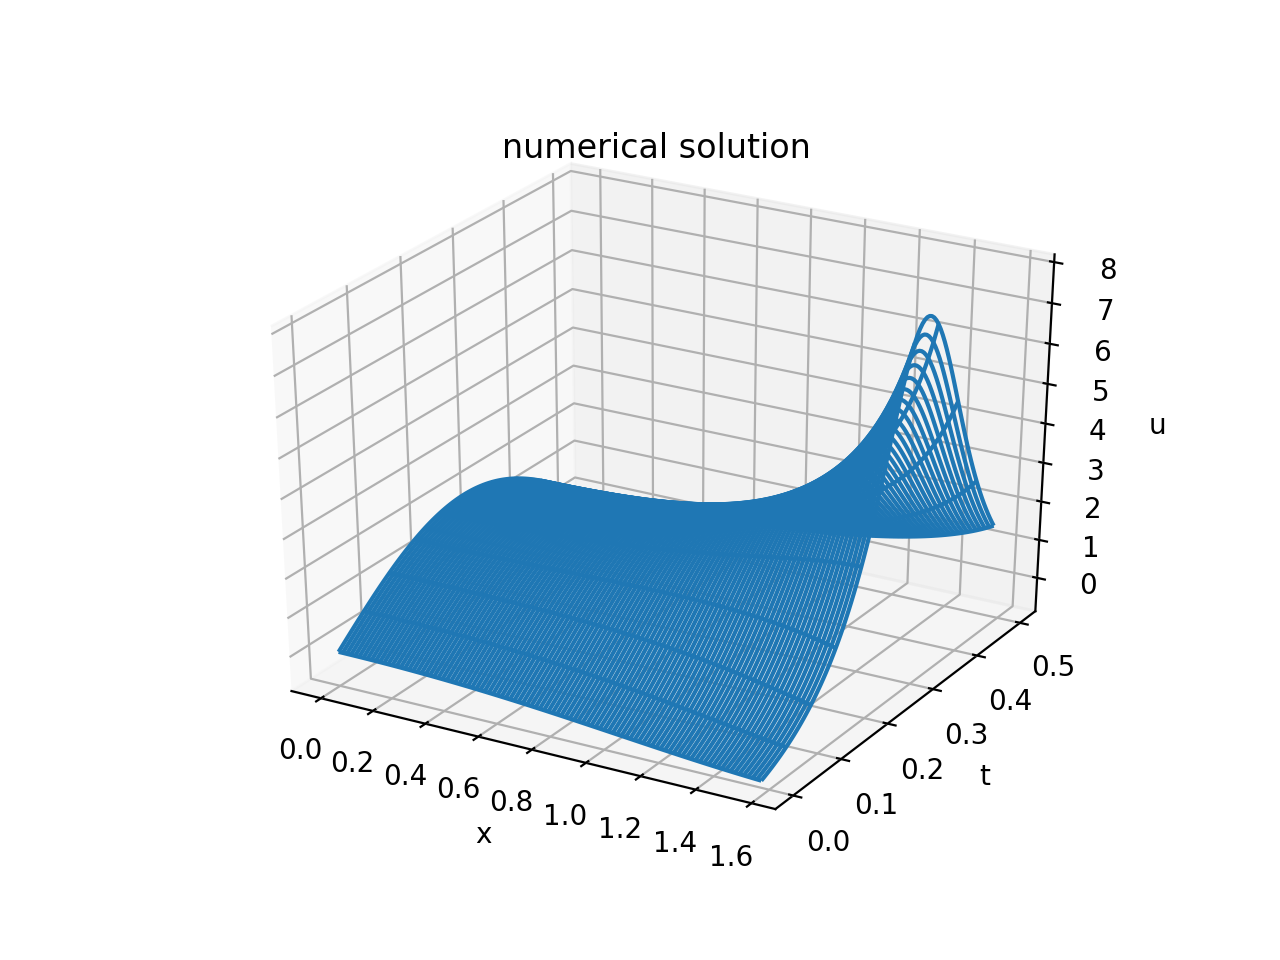

In [252]:
%matplotlib notebook


X, T = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(X, T, y, rstride=10,cstride=1)

ax.set_title('numerical solution')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.show()


## Анализ результатов
Сравним результаты, полученные аналитически и численно
Зафиксируем узел, возьмем соответствующие координаты, посчитаем значение аналитической функции, далее будем сгущать сетку и считать значение на этом узле.

1)Возьмем точку $(x_0 = 0.1963, t_0 = 0.1458)$. Данная точка на сетке в 25 значений имеет координаты $(12,29)$. Значение функции $u(x_0,t_0) = 0.701294$


$$
\begin{array}{|c|c|c|}
\hline \text { Численное решение } & \text { Аналитическое решение } & \mathrm{N}, \mathrm{M} \\
\hline 0.677450 & 0.701294 & 100 \\
\hline 0.677176 & 0.701294 & 125 \\
\hline 0.718368 & 0.701294 & 150 \\
\hline 0.709648 & 0.701294 & 175 \\
\hline 0.705426 & 0.701294 & 200 \\
\hline
\end{array}
$$



<IPython.core.display.Javascript object>


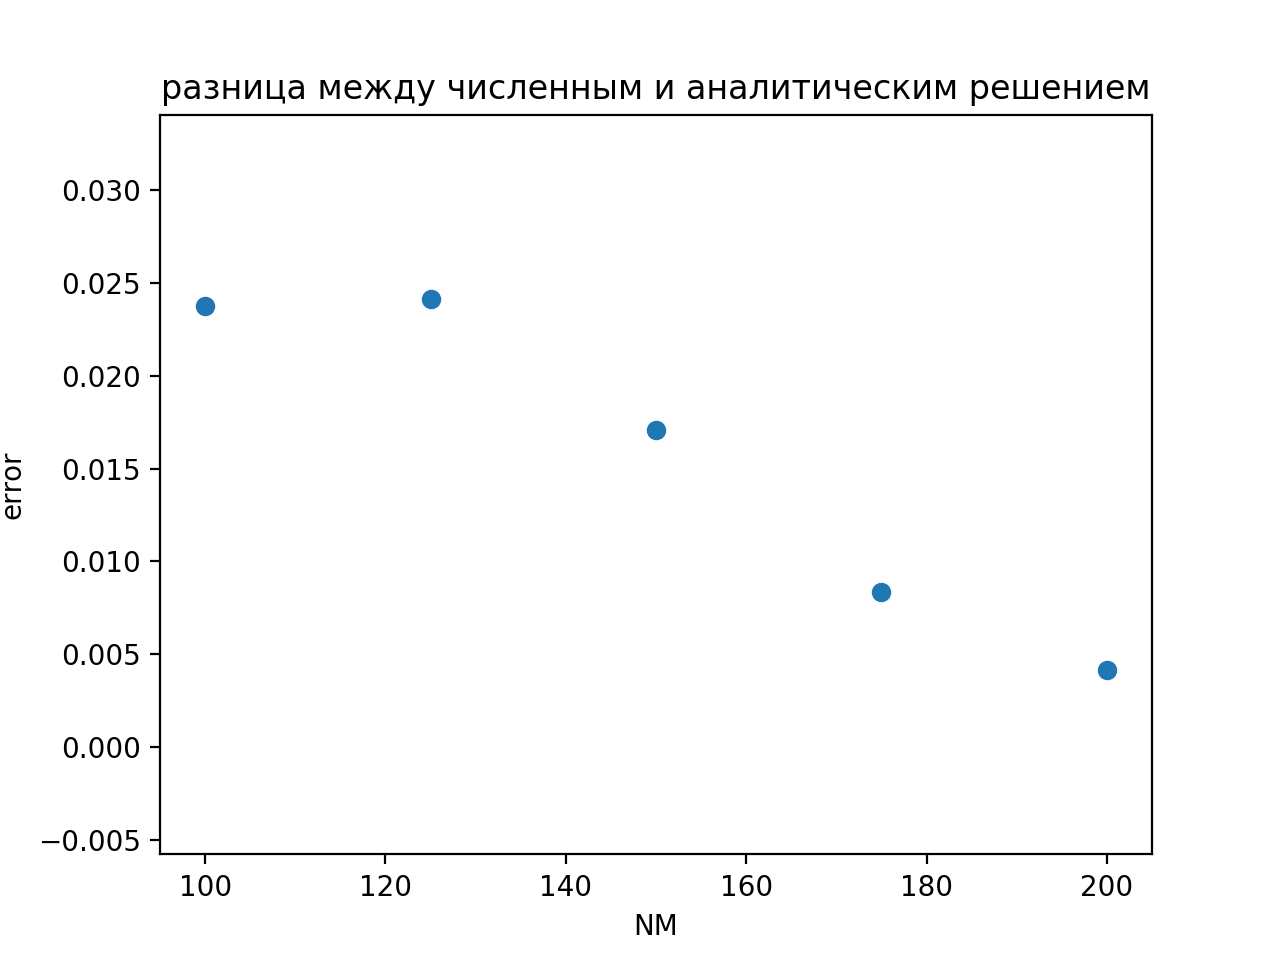

Text(0.5,0,'NM')

In [243]:
coords = [0.677550,0.677176,0.718368,0.709648, 0.705426 ]
num = [100.,125., 150.,175., 200.]
error[:] = [abs(cor - 0.701294) for cor in coords]

fig1, ax1 = plt.subplots()
ax1.scatter(num, error)
ax1.set_title(u'разница между численным и аналитическим решением')
ax1.set_ylabel('error')
ax1.set_xlabel('NM')